In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import norm

Calculons d'abord les valeurs d'une distribution gaussienne, centrée sur la moyenne (mu) de 155 cm et d'écart-type (sigma) de 15 cm. 

Pour ce faire, nous utiliserons le point d'entrée pdf (partial density function) du sous-package stats.norm (norm pour 'loi normale' ou 'loi gaussienne'). 

In [2]:
N = 500

mu = 155    # moyenne des tailles en cm
sigma = 15  # écart-type (en cm)

data_df = pd.DataFrame()

data_df['taille (cm)'] = range(0,201)

data_df['prob density'] = norm.pdf(data_df['taille (cm)'], loc=mu, scale=sigma)

In [3]:
data_df

,taille (cm),prob density
0,0,1.731087e-25
1,1,3.439810e-25
2,2,6.804870e-25
3,3,1.340217e-24
4,4,2.627846e-24
...,...,...
196,196,6.345818e-04
197,197,5.276968e-04
198,198,4.368688e-04
199,199,3.600704e-04


Voyons à quoi ressemble cette distribution:

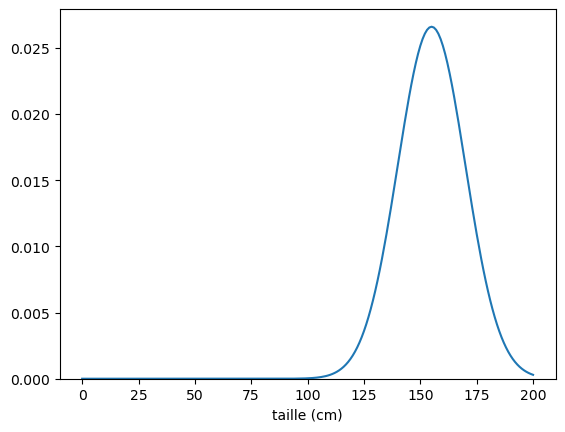

In [4]:
plt.plot(data_df['taille (cm)'], data_df['prob density'])
plt.ylim(bottom=0)
plt.xlabel('taille (cm)')
plt.show()

Pour calculer le nombre approximatif d'individus de taille entre 120 et 155, on partira de la fonrtion norm.cdf donnant la densité de probabilité cumulée depuis le minimum (- l'infini),
jusque la valeur donnée.

Il suffira alors de calculer la valeur correspondant au maximum envisagé, 155, et d'en retrancher la valeur correspondante du minimum voulu, 120,
sans oublier de multiplier par le nombre d'élèves (500).

En effet, la fonction norm.cdf nous donne les résultats pour un cas où la somme complète, l'aire sous la courbe serait de 1!!!

In [5]:
N*(norm.cdf(155, loc=mu, scale=sigma) - norm.cdf(120, loc=mu, scale=sigma))

245.09233568567734

Soit, en arrondissant, 245 individus.

De même, pour obtenir le nombre d'individus plus grands que 185 cm, nous partirons du cumulé de tout jusque 185 cm que l'on complètera à un. 

In [6]:
N * (1 - norm.cdf(185, loc=mu,scale=sigma))

11.375065974089605

Soit 11 individus...

Voyons cela graphiquement:

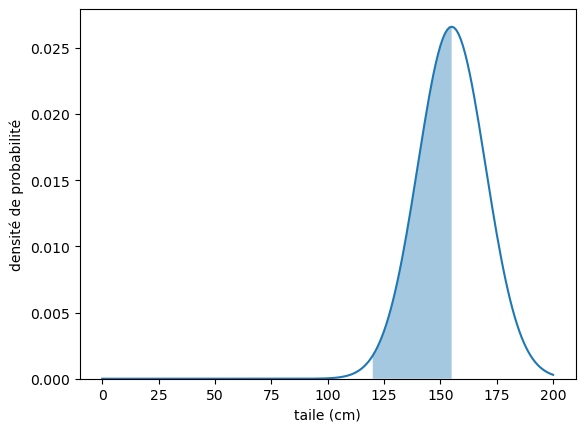

In [7]:
#
# Mise en évidence de la zone intéressant l'exercice a)
#
plt.plot(data_df['taille (cm)'],data_df['prob density'],'-')
select_df = data_df[(data_df['taille (cm)']>=120)&(data_df['taille (cm)']<=155)]
plt.fill_between(select_df['taille (cm)'], select_df['prob density'], alpha=0.4)
plt.ylim(bottom=0)
plt.xlabel('taile (cm)')
plt.ylabel('densité de probabilité')
plt.show()

In [8]:
#
# Aire bleue sous la courbe
#
norm.cdf(155,loc=mu,scale=sigma)-norm.cdf(120,loc=mu,scale=sigma)

0.4901846713713547

Revenons à notre classe de N=500 individus => multiplions le résultat précédent par N:

In [9]:
N*(norm.cdf(155,loc=mu,scale=sigma)-norm.cdf(120,loc=mu,scale=sigma))

245.09233568567734

In [10]:
# ou environ 245 personnes ont une taille entre 120 et 155 cm

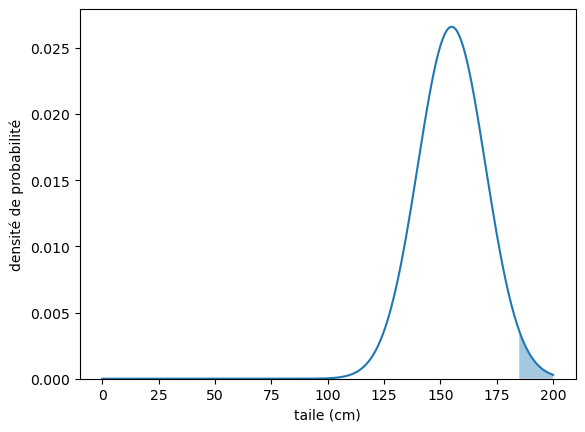

In [11]:
#
# Mise en évidence de la zone intéressant l'exercice b)
#
plt.plot(data_df['taille (cm)'],data_df['prob density'],'-')
select_df = data_df[(data_df['taille (cm)']>=185)]
plt.fill_between(select_df['taille (cm)'], select_df['prob density'], alpha=0.4)
plt.ylim(bottom=0)
plt.xlabel('taile (cm)')
plt.ylabel('densité de probabilité')
plt.show()

In [12]:
#
# Aire bleue sous la courbe
#
(1-norm.cdf(185,loc=mu,scale=sigma))

0.02275013194817921

In [13]:
#
# Nombre de personne de plus de 185 cm sur un échantillon de 500 personnes
#
(1-norm.cdf(185,loc=mu,scale=sigma))*N

11.375065974089605

In [14]:
#
# ou environ 11 personnes ont une taille de plus de 185 cm
#

Solution alternative repartant des définitions mêmes (formule de la gaussienne et approximation de l'intégrale d'une fonction), plus délicate à mettre correctement en oeuvre...

In [15]:
data_df = pd.DataFrame()

mu = 155
sigma = 15

def gaussian(x):
    return math.exp(-((x-mu)**2)/(2*sigma**2))/sigma/math.sqrt(2*math.pi)

max_taille = 250
data_df['taille'] = np.linspace(0,max_taille,max_taille)
data_df['prob density'] = data_df.apply(gaussian, axis=1)

data_df.head(6)

C:\Users\abslu\AppData\Local\Temp\ipykernel_17884\91149757.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.exp(-((x-mu)**2)/(2*sigma**2))/sigma/math.sqrt(2*math.pi)


,taille,prob density
0,0.000000,1.731087e-25
1,1.004016,3.449279e-25
2,2.008032,6.842138e-25
3,3.012048,1.351169e-24
4,4.016064,2.656329e-24
5,5.020080,5.198861e-24


In [16]:
data_df['prob density'].sum()

0.9959999999046208

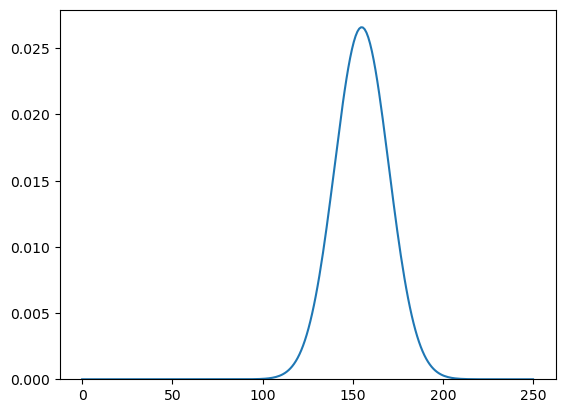

In [17]:
plt.plot(data_df['taille'], data_df['prob density'])
plt.ylim(bottom=0)
plt.show()

In [18]:
N*data_df[(data_df['taille']>120)&(data_df['taille']<155)]['prob density'].sum()

245.73114195079893

In [19]:
N*data_df[data_df['taille']>185]['prob density'].sum()

10.89472440919245